Head of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

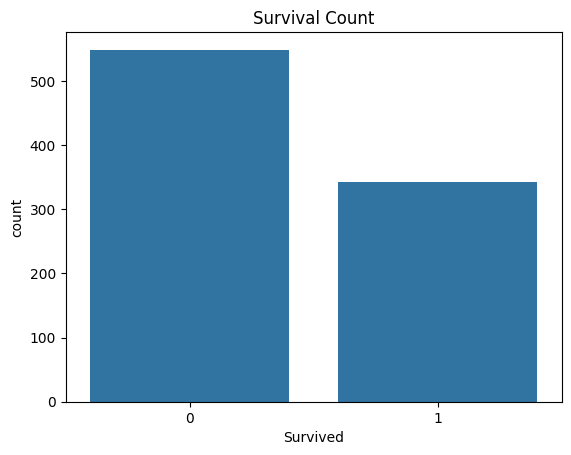

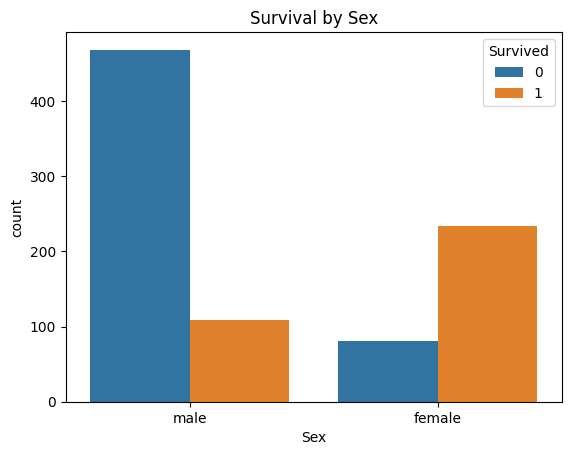

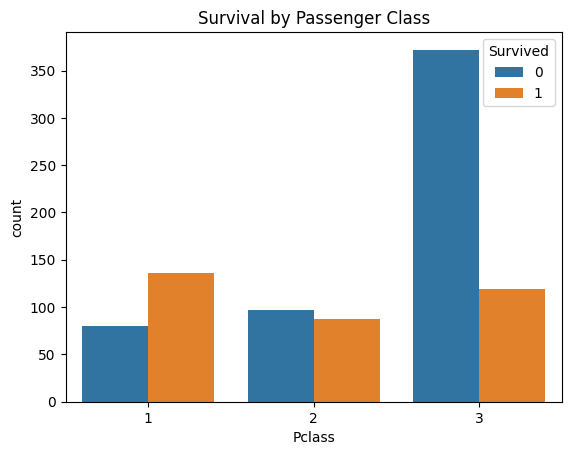

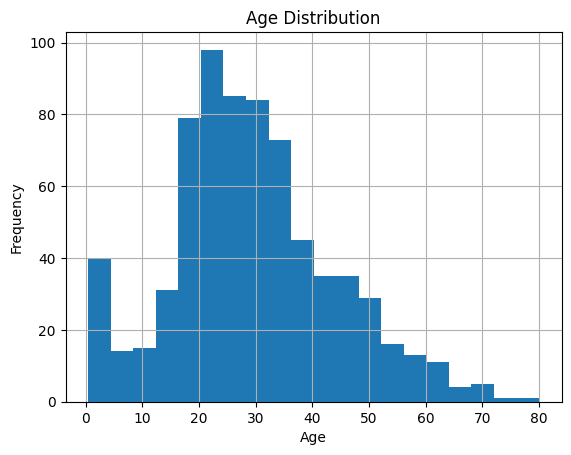

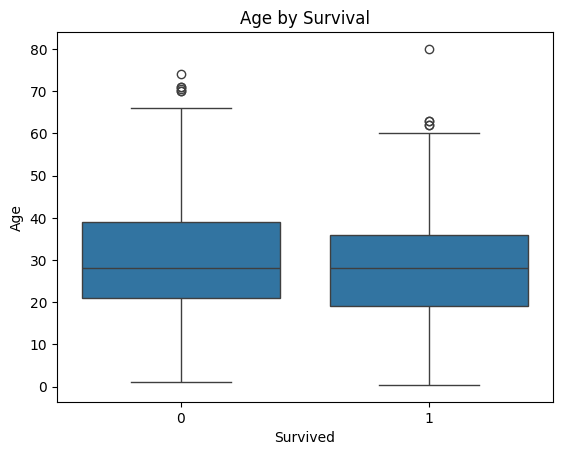

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training dataset
df = pd.read_csv("/content/Titanic_train.csv")

# Display first few rows
print("Head of the dataset:")
print(df.head())

# Display dataset info
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Count plot for survival
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()

# Survival by Sex
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Sex")
plt.show()

# Survival by Pclass
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

# Histogram of Age
df['Age'].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Box plot: Age vs Survived
sns.boxplot(data=df, x='Survived', y='Age')
plt.title("Age by Survival")
plt.show()


In [2]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the data to avoid modifying the original
df_clean = df.copy()

# 1. Handle missing values
# Fill Age with median
df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)

# Fill Embarked with mode
df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
df_clean.drop('Cabin', axis=1, inplace=True)

# Drop Ticket and Name (not useful for logistic regression directly)
df_clean.drop(['Ticket', 'Name'], axis=1, inplace=True)

# 2. Encode categorical variables
# Sex and Embarked
le = LabelEncoder()
df_clean['Sex'] = le.fit_transform(df_clean['Sex'])         # male=1, female=0
df_clean['Embarked'] = le.fit_transform(df_clean['Embarked'])

# 3. Drop PassengerId (optional, not a useful feature)
df_clean.drop('PassengerId', axis=1, inplace=True)

# View cleaned data
print("Cleaned Data Sample:")
print(df_clean.head())


Cleaned Data Sample:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


<ipython-input-2-d1cf7d657bb9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)
<ipython-input-2-d1cf7d657bb9>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define features (X) and target (y)
X = df_clean.drop('Survived', axis=1)
y = df_clean['Survived']

# Split the dataset into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Model is now trained
print("Model training complete.")


Model training complete.


Confusion Matrix:
[[90 15]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1 Score: 0.76
ROC-AUC Score: 0.88


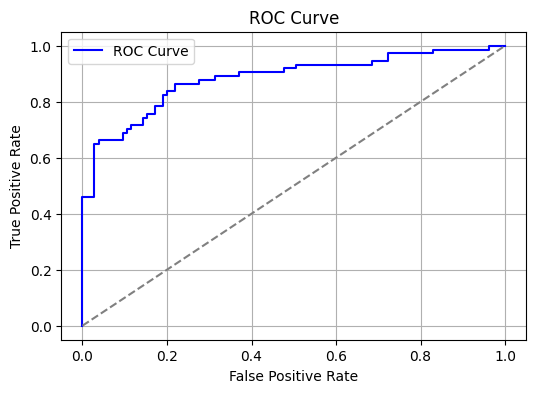

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict on validation set
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]  # Probabilities for ROC curve

# Print metrics
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

print(f"Accuracy: {accuracy_score(y_val, y_pred):.2f}")
print(f"Precision: {precision_score(y_val, y_pred):.2f}")
print(f"Recall: {recall_score(y_val, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_val, y_pred):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_val, y_prob):.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC Curve', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Create a DataFrame of coefficients with feature names
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute value of coefficient
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Drop the helper column for display
coeff_df.drop('Abs_Coefficient', axis=1, inplace=True)

# Display the coefficients
print("Feature Importance (Logistic Regression Coefficients):")
print(coeff_df)


Feature Importance (Logistic Regression Coefficients):
    Feature  Coefficient
1       Sex    -2.596994
0    Pclass    -0.930680
3     SibSp    -0.293905
6  Embarked    -0.218777
4     Parch    -0.111853
2       Age    -0.030433
5      Fare     0.002534


In [6]:
# Save this as `app.py` and run using: streamlit run app.py
!pip install streamlit


import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Load the trained model (make sure to save it first)
# with open('titanic_model.pkl', 'rb') as file:
#     model = pickle.load(file)

# For demo purposes, let's re-train a simple model here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('Titanic_train.csv')

# Data preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Streamlit UI
st.title("🚢 Titanic Survival Predictor")
st.write("Enter passenger details to predict survival")

# User inputs
pclass = st.selectbox("Passenger Class (1 = Upper, 2 = Middle, 3 = Lower)", [1, 2, 3])
sex = st.radio("Sex", ['male', 'female'])
age = st.slider("Age", 0, 80, 30)
sibsp = st.number_input("Siblings/Spouses Aboard", 0, 10, 0)
parch = st.number_input("Parents/Children Aboard", 0, 10, 0)
fare = st.number_input("Fare Paid", 0.0, 600.0, 50.0)
embarked = st.selectbox("Port of Embarkation", ['C', 'Q', 'S'])

# Encode inputs
sex_encoded = 1 if sex == 'male' else 0
embarked_encoded = {'C': 0, 'Q': 1, 'S': 2}[embarked]

# Predict
if st.button("Predict Survival"):
    input_data = np.array([[pclass, sex_encoded, age, sibsp, parch, fare, embarked_encoded]])
    prediction = model.predict(input_data)[0]
    result = "🎉 Survived!" if prediction == 1 else "❌ Did Not Survive"
    st.subheader(f"Prediction: {result}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.1 MB/s eta 0:00:00


<ipython-input-6-b1e1fb538e8f>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-6-b1e1fb538e8f>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [8]:
#!streamlit run app.py

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Assuming you already have y_val (true labels) and y_pred (predicted labels), and y_prob (probabilities)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print(f"Accuracy: {accuracy_score(y_val, y_pred):.2f}")
print(f"Precision: {precision_score(y_val, y_pred):.2f}")
print(f"Recall: {recall_score(y_val, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_val, y_pred):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_val, y_prob):.2f}")


Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1 Score: 0.76
ROC AUC Score: 0.88


In [9]:
import pickle

# Save trained model
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(model, file)
import streamlit as st
import numpy as np
import pickle

# Load saved model
with open('logistic_model.pkl', 'rb') as file:
    model = pickle.load(file)

st.title("Titanic Survival Prediction")

pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.selectbox("Sex", ['Male', 'Female'])
age = st.number_input("Age", value=30.0)
sibsp = st.number_input("Siblings/Spouses Aboard", value=0)
parch = st.number_input("Parents/Children Aboard", value=0)
fare = st.number_input("Fare Paid", value=50.0)
embarked = st.selectbox("Embarked", ['S', 'C', 'Q'])

# Encode categorical
sex = 1 if sex == 'Male' else 0
embarked_dict = {'S': 2, 'C': 0, 'Q': 1}
embarked = embarked_dict[embarked]

# Predict
if st.button("Predict"):
    input_data = np.array([[pclass, sex, age, sibsp, parch, fare, embarked]])
    prediction = model.predict(input_data)
    prob = model.predict_proba(input_data)[0][1]
    result = "Survived" if prediction[0] == 1 else "Did Not Survive"
    st.write(f"Prediction: **{result}**")
    st.write(f"Probability of Survival: **{prob:.2f}**")


2025-05-07 12:20:35.364 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 12:20:35.366 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 12:20:35.367 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 12:20:35.368 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 12:20:35.368 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 12:20:35.369 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 12:20:35.370 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 12:20:35.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar